<a href="https://colab.research.google.com/github/kay-kay-t/sales-predictions/blob/main/Project1_Sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
filename = '/content/drive/MyDrive/Data/sales_predictions.csv'

In [157]:
# Load data 
items = pd.read_csv(filename)
items.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
items.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


What are the datatypes of each variable?

In [159]:
# Checking data types
items.info()
# It looks like Item_Weight and Outlet_Size have some null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Identify missing values.

In [160]:
# Displayind data only with Outlet_Size = NaN
null_outlet_size = pd.isnull(items['Outlet_Size'])
items[null_outlet_size]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [161]:
# Checking what types corespond with outlet size
pattern = items.groupby(['Outlet_Size', 'Outlet_Type']).sum()
pattern

# Based on below let's assume that High = Type1; Medium = Type2,3; Small = Grocery Store

Item_Weight  ...  Item_Outlet_Sales
Outlet_Size Outlet_Type                     ...                   
High        Supermarket Type1    12121.730  ...       2.142664e+06
Medium      Supermarket Type1    12013.225  ...       2.183970e+06
            Supermarket Type2    11946.465  ...       1.851823e+06
            Supermarket Type3        0.000  ...       3.453926e+06
Small       Grocery Store            0.000  ...       1.796941e+05
            Supermarket Type1    23897.420  ...       4.386518e+06

[6 rows x 5 columns]

In [162]:
# Replacing NaN Outlet_Size with values based on the pattern above
high = items['Outlet_Type'] == "Supermarket Type1"
medium = items['Outlet_Type'] == ("Supermarket Type2" or "Supermarket Type3")
small = items['Outlet_Type'] == 'Grocery Store'

items.loc[high & (items['Outlet_Size'].isna()), 'Outlet_Size'] = 'High'
items.loc[medium & (items['Outlet_Size'].isna()), 'Outlet_Size'] = 'Medium'
items.loc[small & (items['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [163]:
# Checking if all NaN values replaced successfully
items['Outlet_Size'].isnull().sum()

0

In [164]:
# Displayind data only with Item_Weigh = NaN
null_item_weight = pd.isnull(items['Item_Weight'])
items[null_item_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [165]:
# Finding min for Item_Weight	
items['Item_Weight'].min()

4.555

In [166]:
# Finding max for Item_Weight	
items['Item_Weight'].max()

21.35

In [167]:
# Finding average and replacing Nans with it 
items['Item_Weight'].mean()
column_means = items.mean()
items = items.fillna(column_means)

Confirm that there are no missing values after addressing them.

In [168]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


 How many rows and columns?

In [169]:
# Checking how many rows/columns
items.shape

(8523, 12)

 Are there duplicates? If so, drop any duplicates.

In [170]:
# Checking if there any duplicates
items.duplicated().any()

False

In [171]:
# Looks like there are no duplicates
items[items.duplicated(keep = False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Find and fix any inconsistent categories of data

In [172]:
# Using for loop to check all data frame for inconsistent values
for col in items.columns:
  print(items[col].value_counts())

FDG33    10
FDW13    10
FDP25     9
NCB18     9
FDF56     9
         ..
DRF48     1
FDE52     1
FDY43     1
FDC23     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene    

In [173]:
# Per result above we can see, that there are inconsistent values in Item_Fat_Content
# Checking for inconsistent values in Item_Fat_Content
items[['Item_Fat_Content']].value_counts() 


Item_Fat_Content
Low Fat             5089
Regular             2889
LF                   316
reg                  117
low fat              112
dtype: int64

In [174]:
# Replacing incorrect values in Item_Fat_Content
# One way:
# items.loc[items['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat' 
# items.loc[items['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
# items.loc[items['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'

# Another way:
items['Item_Fat_Content'] = items['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
items['Item_Fat_Content'] = items['Item_Fat_Content'].replace(['reg'], 'Regular')
items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [175]:
# Verifying values were succesfully replaced
items[['Item_Fat_Content']].value_counts() 

Item_Fat_Content
Low Fat             5517
Regular             3006
dtype: int64

For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [176]:
# Numerical columns: Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year

Item_Weight

In [177]:
items['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

Item_Visibility

In [178]:
items['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

Item_MRP

In [179]:
items['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

Outlet_Establishment_Year

In [180]:
items['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

Histogram to view the distributions of various features in your dataset.

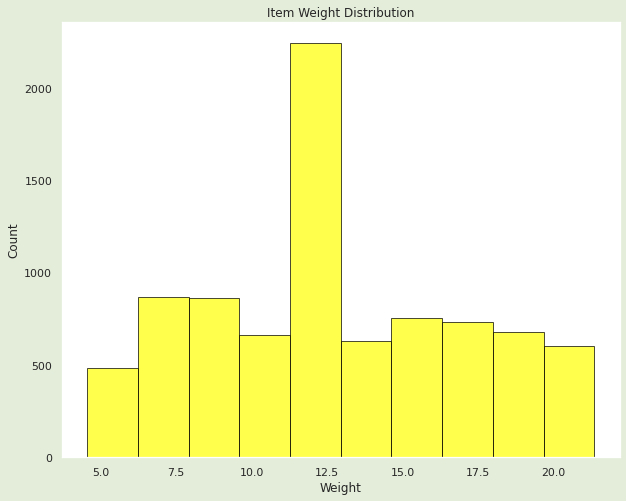

This histogram shows that the most amount of items have weight between 11.5 and 12.5


In [181]:
# Histogram that shows Item Weight Distidution
items['Item_Weight'].hist(bins=10, edgecolor='black', facecolor='yellow', alpha=0.7)

plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Item Weight Distribution')
plt.show()
print('This histogram shows that the most amount of items have weight between 11.5 and 12.5')

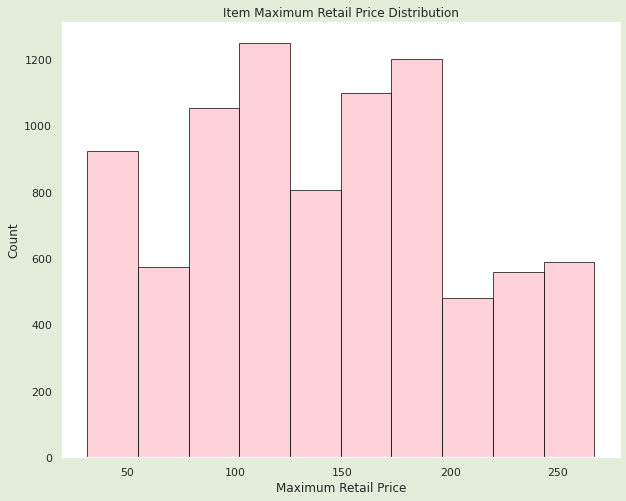

This histogram shows that the most amount of items priced at range of 100 to 125. The least amount is in price range between 200 and 225


In [182]:
# Histogram that shows Item Maximum Retail Price Distribution
items['Item_MRP'].hist(bins=10, edgecolor='black', facecolor='pink', alpha=0.7)
plt.xlabel('Maximum Retail Price')
plt.ylabel('Count')
plt.title('Item Maximum Retail Price Distribution')
plt.show()
print('This histogram shows that the most amount of items priced at range of 100 to 125. The least amount is in price range between 200 and 225')

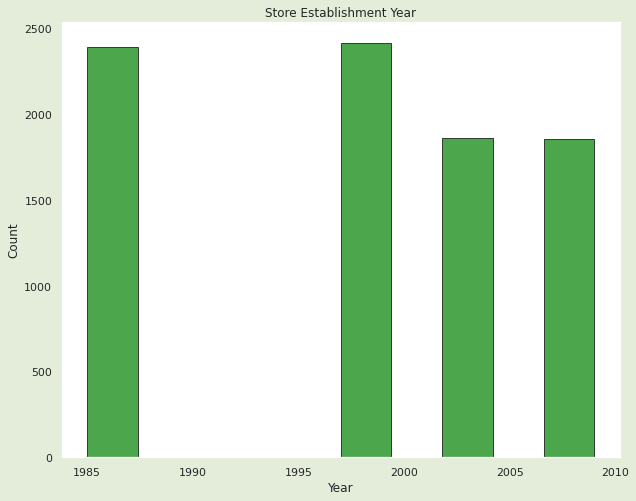

This histogram shows that most of the stores were established between in 1985-1988 and between 1997-1999


In [183]:
items['Outlet_Establishment_Year'].hist(bins=10, edgecolor='black', color='green', alpha=0.7)
plt.ticklabel_format(useOffset=False, style='plain')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Store Establishment Year')
plt.show()
print('This histogram shows that most of the stores were established between in 1985-1988 and between 1997-1999')


Boxplot to view statistical summaries of various features in your dataset.

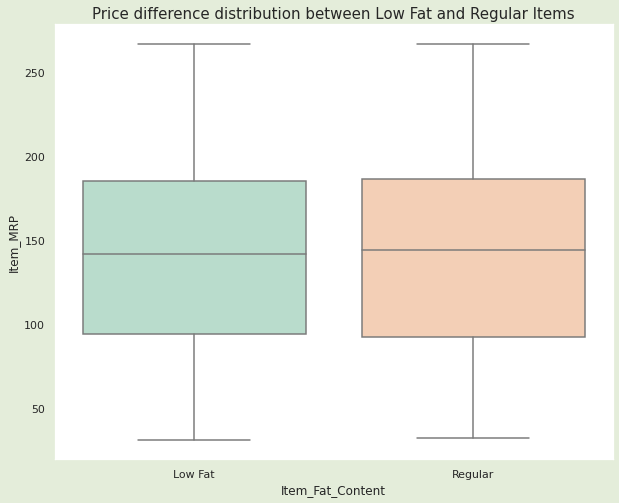

According to boxplot above, there is no difference in price for Low Fat Items and Regular Items. There is no outliers.


In [184]:
# Creating boxplot to see distribution of Maximum Retail Price by Fat Content using seaborn
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=items, palette="Pastel2")
plt.title('Price difference distribution between Low Fat and Regular Items', fontsize = 15)
plt.show()
print('According to boxplot above, there is no difference in price for Low Fat Items and Regular Items. There is no outliers.')

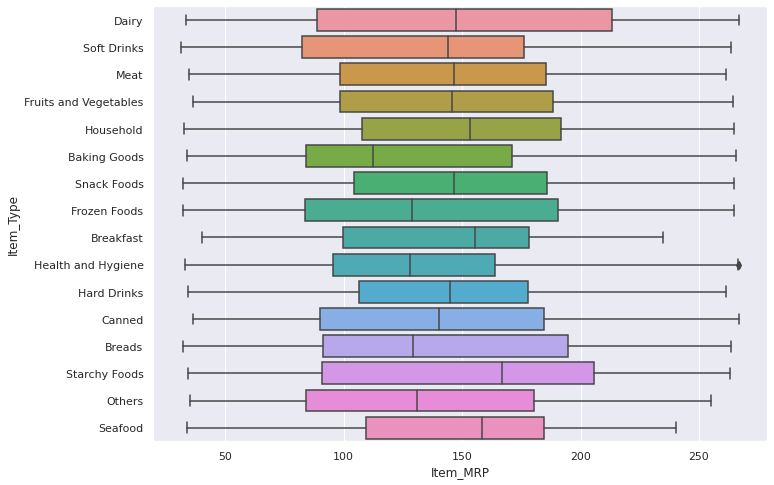

Boxplot above shows price range for all item types. Also we can notice there is some outliers for Health and Hygience type.


In [185]:
# Creating a boxplot that shows distribution of Maximum Retail Price by Item Types using seaborn
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x = items['Item_MRP'], y = items['Item_Type']);
plt.show()
print('Boxplot above shows price range for all item types. Also we can notice there is some outliers for Health and Hygience type.')


In [186]:
# Finding outliers. Thanks to Purvi for helping me come up with solution :)
a = items['Item_Type'] == 'Health and Hygiene'
b = items['Item_MRP'] > 260
c = (a & b)

items[c]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1127,NCM05,12.857645,Low Fat,0.059557,Health and Hygiene,263.7226,OUT027,1985,Medium,Tier 3,Supermarket Type3,6872.3876
3890,NCQ29,12.000000,Low Fat,0.000000,Health and Hygiene,262.3278,OUT017,2007,High,Tier 2,Supermarket Type1,1561.9668
4289,NCM05,6.825000,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362
4715,NCS29,12.857645,Low Fat,0.121765,Health and Hygiene,264.1884,OUT019,1985,Small,Tier 1,Grocery Store,264.9884
4877,NCS29,9.000000,Low Fat,0.069654,Health and Hygiene,266.2884,OUT049,1999,Medium,Tier 1,Supermarket Type1,2914.8724
5058,NCS29,12.857645,Low Fat,0.069209,Health and Hygiene,264.0884,OUT027,1985,Medium,Tier 3,Supermarket Type3,4504.8028
5254,NCS29,9.000000,Low Fat,0.069488,Health and Hygiene,266.6884,OUT013,1987,High,Tier 3,Supermarket Type1,3974.8260
5558,NCS29,9.000000,Low Fat,0.069532,Health and Hygiene,266.5884,OUT035,2004,Small,Tier 2,Supermarket Type1,6624.7100
6145,NCM05,6.825000,Low Fat,0.100172,Health and Hygiene,262.7226,OUT010,1998,Small,Tier 3,Grocery Store,264.3226
6753,NCM05,6.825000,Low Fat,0.059836,Health and Hygiene,264.3226,OUT035,2004,Small,Tier 2,Supermarket Type1,4229.1616


Based on a dataframe above, we can see, that Low Fat Health & Hygiene Items have the highest Max Retail Price.  

In [187]:
print(np.where((items['Item_Type']=='Health and Hygiene') & (items['Item_MRP'] > 260)))

(array([1127, 3890, 4289, 4715, 4877, 5058, 5254, 5558, 6145, 6753, 7556,
       8244, 8375]),)


Heatmap of the correlation between features.

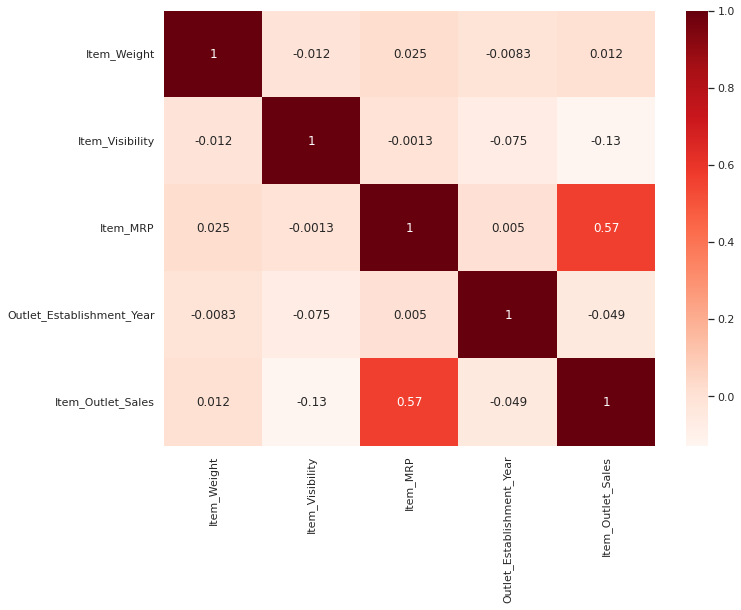

Heatmap above shows that Item Max Retail Prise has high impact on Outlet Sales


In [188]:
corr = items.corr()
sns.heatmap(corr, cmap = 'Reds', annot=True)
plt.show()
print('Heatmap above shows that Item Max Retail Prise has high impact on Outlet Sales')

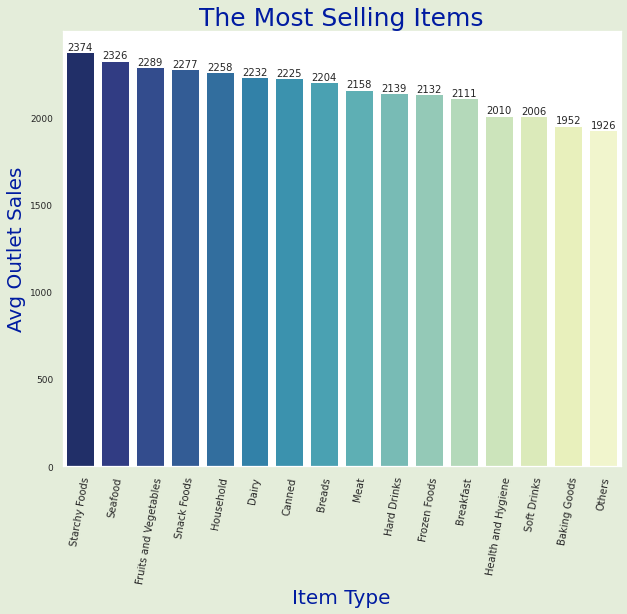

In [189]:
types = items.groupby('Item_Type')['Item_Outlet_Sales'].mean().reset_index(name = 'Avg Outlet Sales').sort_values('Avg Outlet Sales', ascending = False)


sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'#e4edda'})
sns.barplot(y='Avg Outlet Sales',  x='Item_Type', data=types,
              palette='YlGnBu_r');

plt.title('The Most Selling Items', color='#001ba1', fontsize = 25)  

plt.xticks(fontsize = 10, rotation = 80)
plt.yticks(fontsize = 9)

plt.ylabel('Avg Outlet Sales', color='#001ba1', fontsize=20)
plt.xlabel('Item Type', color='#001ba1', fontsize=20)



ax=plt.gca()

for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

Visualization above shows which item types are selling the most and the least. That can give an idea, which items the store should try to sell more.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


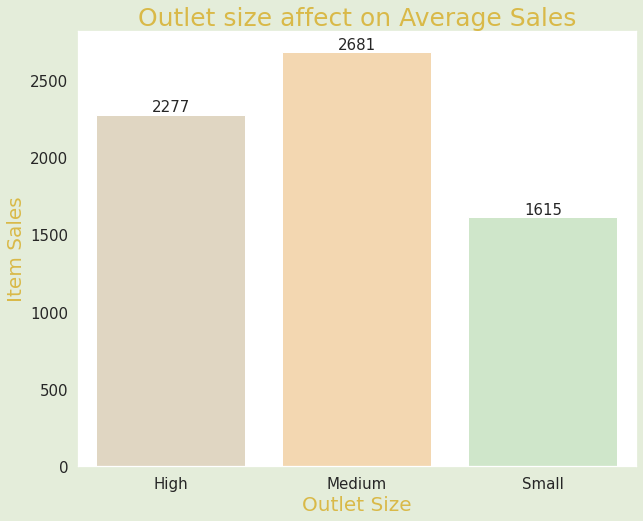

In [190]:
# Creating countplot with Seaborn to see how outlet size affects sales
sales = items.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().reset_index(name = 'Avg Outlet Sales')


sns.set(rc={'figure.figsize':(10,8), 'axes.facecolor':'white', 'figure.facecolor':'#e4edda'})
sns.barplot('Outlet_Size', 'Avg Outlet Sales', data=sales,
              palette='Pastel1_r');

plt.title('Outlet size affect on Average Sales', color='#d9b948', fontsize = 25)  

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Outlet Size', color='#d9b948', fontsize=20)
plt.ylabel('Item Sales', color='#d9b948', fontsize=20)

# Creating labels (from https://www.youtube.com/watch?v=NIy90kwN4n4)
ax=plt.gca()

for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2, p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom', fontsize=15)

plt.show()

Bar Plot above shows that Medium outlets have the highest sales, even though we could assume that the High size ones should've had.

Transforming categorical variables into numbers.

In [191]:
items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [192]:
# Transforming Item Fat Content into numbers
items['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [193]:
fat_content = {'Low Fat': 0, 'Regular' : 1}

In [194]:
items['Item_Fat_Content'] =  items['Item_Fat_Content'].replace(fat_content)
items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [195]:
# Transforming Item Outlet Size into numbers
items['Outlet_Size'].unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [196]:
fat_content = {'Small': 0, 'Medium' : 1, 'High' : 2}

In [197]:
items['Outlet_Size'] =  items['Outlet_Size'].replace(fat_content)
items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,2,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,Tier 3,Supermarket Type2,1845.5976


In [198]:
# Transforming Item Item_Type, Outlet_Location_Type, Outlet_Type into numbers with one hot encoding
ohe_items = pd.get_dummies(items, columns=['Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
ohe_items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,249.8092,OUT049,1999,1,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.920,1,0.019278,48.2692,OUT018,2009,1,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,FDN15,17.500,0,0.016760,141.6180,OUT049,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,FDX07,19.200,1,0.000000,182.0950,OUT010,1998,0,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.930,0,0.000000,53.8614,OUT013,1987,2,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,214.5218,OUT013,1987,2,2778.3834,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
8519,FDS36,8.380,1,0.046982,108.1570,OUT045,2002,2,549.2850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8520,NCJ29,10.600,0,0.035186,85.1224,OUT035,2004,0,1193.1136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
8521,FDN46,7.210,1,0.145221,103.1332,OUT018,2009,1,1845.5976,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [199]:
# Dropping 	Item_Identifier and Outlet_Identifier
ohe_items.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
ohe_items

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,1,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.500,0,0.016760,141.6180,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,0,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,2,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1987,2,2778.3834,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
8519,8.380,1,0.046982,108.1570,2002,2,549.2850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
8520,10.600,0,0.035186,85.1224,2004,0,1193.1136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
8521,7.210,1,0.145221,103.1332,2009,1,1845.5976,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


Assign the "Item_Outlet_Sales" column as your target and the rest of the variables as your features matrix.  

In [200]:
y = ohe_items['Item_Outlet_Sales']
X =ohe_items.drop(columns = 'Item_Outlet_Sales')

In [201]:
y.shape

(8523,)

In [202]:
X.shape

(8523, 26)

Train test split data set

In [203]:
# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [204]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Evaluate your test set results using r2.

In [205]:
test_score = reg_model.score(X_test, y_test)
print(test_score)

0.5660618087246838


In [206]:
train_score = reg_model.score(X_train, y_train)
print(train_score)

0.5606446946459837


Per R^2 above, about 56% of the variation in 'Item_Outlet_Sales' can be explained by the features. Train and test scores are pretty similar, so this model makes really good predictions on the test data.

Evaluate your test set results using RMSE

In [207]:
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))

print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

Training RMSE: 1140.2861766872174
Testing RMSE: 1094.1780540846619


Tranning model is incorrect by 1140. Testing model is incorrect by 1094.

Building and evaluating a simple decision tree model.

In [208]:
# Imports for Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [209]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [210]:
# Fitting the model 
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [211]:
# Prediction
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [212]:
# Evaluating the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.15930919901843388


Regular Decision Tree did really poor on predictions and gave us test score 15%. 

Building and evaluating a bagged tree model.

In [213]:
# Making an instance of the Model
bagreg = BaggingRegressor(random_state = 42)
bagreg

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [214]:
# Training the model on the data
bagreg.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [215]:
# Predicting the values for y
bagreg.predict(X_test)

array([ 974.33172, 1233.86056,  724.0575 , ..., 4324.30442, 2101.79744,
       2436.09562])

In [216]:
# Evaluating model performance
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9182102766404884
0.5153952406542452


Performing Bagging Regression improved test score, bur still gives us not the best results, since test score only 51% and it's pretty distant from train score.

Building and evaluating a random forest model.  

In [217]:
# Making an instance of the Model
rf = RandomForestRegressor(random_state = 42)
rf

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [218]:
# Training the model on the data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [219]:
# Predicting the values for y
rf.predict(X_test)

array([ 859.654328,  936.694046,  765.317126, ..., 3994.893212,
       1954.296108, 2149.062582])

In [220]:
# Evaluating model performance
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9370662875072404
0.5441662529847958


Out of those three models above, Random forest have the best result so far. We can try to improve it changing the max_depth range.

In [221]:
# The depth of each tree
depth = np.array([estimator.get_depth() for estimator in rf.estimators_])
depth

array([34, 31, 33, 31, 33, 35, 27, 37, 37, 32, 34, 29, 36, 32, 33, 34, 36,
       34, 31, 32, 33, 31, 31, 31, 37, 30, 36, 35, 32, 34, 32, 34, 31, 29,
       32, 33, 34, 35, 33, 30, 33, 33, 33, 32, 33, 38, 32, 29, 33, 29, 33,
       35, 39, 31, 31, 33, 32, 32, 32, 31, 35, 31, 31, 30, 33, 35, 31, 31,
       31, 32, 36, 32, 37, 33, 31, 30, 31, 36, 40, 36, 33, 32, 33, 31, 32,
       33, 36, 37, 31, 31, 29, 33, 32, 34, 36, 32, 32, 35, 35, 32])

In [222]:
max_depth_range = list(range(2, 40))

r2 = []
for depth in max_depth_range:
    rf = RandomForestRegressor(max_depth = depth, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

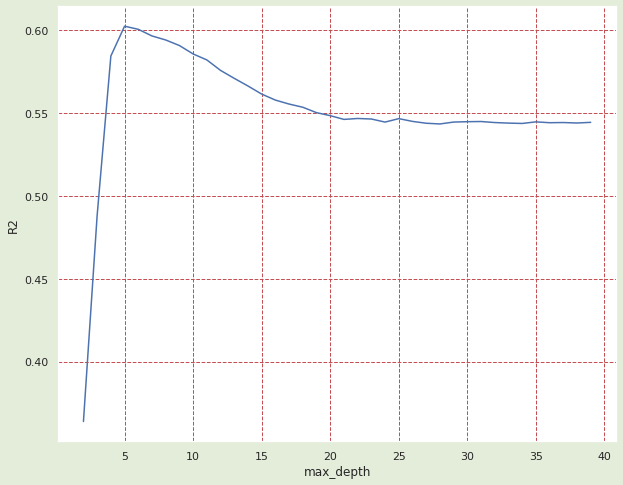

In [223]:
plt.plot(max_depth_range, r2)

plt.grid(color='r', linestyle='--', linewidth=1 )
plt.xlabel('max_depth')
plt.ylabel('R2');
plt.show()

Graf above shows, that the best result could be achieved using max_depth of 5. Let's try that.

In [224]:
# Running the model with 5 value
rf_5 = RandomForestRegressor(max_depth = 5, random_state = 42)
rf_5.fit(X_train, y_train)
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print(rf_5_train_score)
print(rf_5_test_score)

0.619882193339827
0.6024842557552188


So using max_depth of 5 bring our train score and test score really close to each other and increases the test score to 60% which is a slight improvement.

Comparig the performance of models based on r^2

In [225]:
#Linear Regression
test_score = reg_model.score(X_test, y_test)
train_score = reg_model.score(X_train, y_train)
print('Lenear Regression Model:')
print(test_score)
print(train_score)
#Decision Tree
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print('Decision Tree Model:')
print(train_score)
print(test_score)
# Bagged Tree 
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print('Bagged Tree Model:')
print(bagreg_train_score)
print(bagreg_test_score)
# Random Forest
rf_5_train_score = rf_5.score(X_train, y_train)
rf_5_test_score = rf_5.score(X_test, y_test)
print('Random Forest Model with max_depth of 5:')
print(rf_5_train_score)
print(rf_5_test_score)

Lenear Regression Model:
0.5660618087246838
0.5606446946459837
Decision Tree Model:
1.0
0.15930919901843388
Bagged Tree Model:
0.9182102766404884
0.5153952406542452
Random Forest Model with max_depth of 5:
0.619882193339827
0.6024842557552188


Per otput above we see that Random Forest Model giving us the best result out of all four models.

Compare the performance of your models based on rmse.

In [226]:
# Linear Reg
print('Linear Regression Model:')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, reg_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, reg_model.predict(X_test))))

# Decision Tree
print('Decision Tree Model:')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, dec_tree.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, dec_tree.predict(X_test))))

#Bagged Tree
print('Bagged Tree Model:')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, bagreg.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, bagreg.predict(X_test))))

#Random Forest
print('Random Forest Model with max_depth of 5:')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, rf.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


Linear Regression Model:
Training RMSE: 1140.2861766872174
Testing RMSE: 1094.1780540846619
Decision Tree Model:
Training RMSE: 0.0
Testing RMSE: 1522.9730220775825
Bagged Tree Model:
Training RMSE: 491.9888854109978
Testing RMSE: 1156.2930098370166
Random Forest Model with max_depth of 5:
Training RMSE: 431.589518411024
Testing RMSE: 1121.1120993931045


The biggest Training Error has Decision Tree model. It did the worst by R^2 as well. I definetely don't recomend using it.
Random Forest model has second smallest error and did the best on predictions. So I would recommend using Random Forest model with max depth of 5 for this dataset.